# Notebook for running time series model (NAB)


In [2]:
import pandas as pd
import numpy as np

In [3]:
from matplotlib import pyplot as plt
import matplotlib
font = {'family' : 'normal', 'size'   : 18}
matplotlib.rc('font', **font)

import matplotlib.cm as cm
plt.rcParams["figure.figsize"] = (20,12)

### load in one example time series data

In [4]:
#["'C1001065306'" "'es_health'"] is a good example 
example_c = 'C1001065306'
example_m = 'es_health'

In [5]:
example_ts_file_path = f"""../../data/02_intermediate/financial_fraud/ts_data/'{example_c}'_'{example_m}'_transaction_data.csv"""

In [6]:
ts_example_data = pd.read_csv(example_ts_file_path)

In [7]:
ts_example_data.head(10)

,timestamp,value
0,21,37.10
1,31,108.32
2,31,188.94
3,36,906.87
4,38,146.25
5,63,31.41
6,63,177.82
7,63,106.47
8,122,1024.36
9,127,80.72


In [8]:
example_ts_label_file_path = f"""../../data/02_intermediate/financial_fraud/ts_label/'{example_c}'_'{example_m}'_transaction_label.csv"""

In [9]:
ts_example_label = pd.read_csv(example_ts_label_file_path)

In [10]:
ts_example_label.head(10)

,timestamp,label
0,21,0
1,31,0
2,31,0
3,36,1
4,38,0
5,63,0
6,63,0
7,63,0
8,122,1
9,127,1


In [11]:
ts_example_data.shape, ts_example_label.shape

((16, 2), (16, 2))

### plot time series 

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


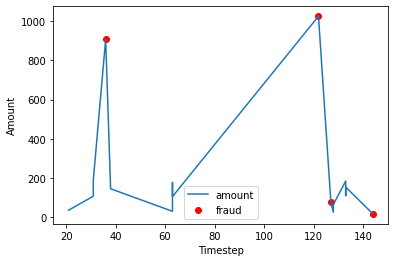

In [12]:
plt.plot(ts_example_data.timestamp, ts_example_data.value, label='amount')
label_pos =np.where(ts_example_label.label==1)
plt.scatter(ts_example_data.iloc[label_pos].timestamp, ts_example_data.iloc[label_pos].value, label='fraud', color='red')
plt.xlabel('Timestep')
plt.ylabel('Amount')
plt.legend()
plt.show()

## run NAB model training and inference 

In [13]:
import os
import sys

In [14]:
sys.path.append('/home/ec2-user/SageMaker/anomaly-detection-spatial-temporal-data/src/')

In [15]:
%load_ext autoreload
%autoreload 2

In [16]:
from anomaly_detection_spatial_temporal_data.model.time_series import NABAnomalyDetector

In [17]:
model_name = 'contextOSE'
model_path = '/home/ec2-user/SageMaker/anomaly-detection-spatial-temporal-data/src/anomaly_detection_spatial_temporal_data/model/NAB'
input_dir = "/home/ec2-user/SageMaker/anomaly-detection-spatial-temporal-data/data/02_intermediate/financial_fraud/ts_data"
output_dir =  "/home/ec2-user/SageMaker/anomaly-detection-spatial-temporal-data/data/07_model_output/financial_fraud/ts_result"


In [18]:
model_obj = NABAnomalyDetector(
    model_name, 
    model_path,
    input_dir,
    output_dir,
)

In [19]:
model_obj.predict()

Predicting ...
0: Beginning detection with contextOSE for 'C849342403'_'es_transportation'_transaction_data.csv
. 163: Beginning detection with contextOSE for 'C993027768'_'es_transportation'_transaction_data.csv
. 652: Beginning detection with contextOSE for 'C1413774656'_'es_food'_transaction_data.csv
. 652: Completed processing 13 records at 2022-07-13 23:38:26.853013
652: Results have been written to /home/ec2-user/SageMaker/anomaly-detection-spatial-temporal-data/data/07_model_output/financial_fraud/ts_result/contextOSE/contextOSE_'C1413774656'_'es_food'_transaction_data.csv
653: Beginning detection with contextOSE for 'C777438443'_'es_transportation'_transaction_data.csv
. 326: Beginning detection with contextOSE for 'C1297329735'_'es_transportation'_transaction_data.csv
. 489: Beginning detection with contextOSE for 'C918659260'_'es_transportation'_transaction_data.csv
. 653: Completed processing 92 records at 2022-07-13 23:38:26.914766
653: Results have been written to /home/ec

## read in inference result 

In [20]:
output_dir= f'../../data/07_model_output/financial_fraud/ts_result/{model_name}'

In [21]:
example_result_file_path = os.path.join(output_dir, f"""{model_name}_'{example_c}'_'{example_m}'_transaction_data.csv""")

In [22]:
example_result_file_path

"../../data/07_model_output/financial_fraud/ts_result/contextOSE/contextOSE_'C1001065306'_'es_health'_transaction_data.csv"

In [23]:
ts_example_result = pd.read_csv(example_result_file_path)

In [24]:
ts_example_result

,timestamp,value,anomaly_score,label
0,21,37.10,0.0,0
1,31,108.32,0.0,0
2,31,188.94,0.0,0
3,36,906.87,0.0,0
4,38,146.25,0.0,0
5,63,31.41,0.0,0
6,63,177.82,0.0,0
7,63,106.47,0.0,0
8,122,1024.36,0.0,0
9,127,80.72,0.0,0


In [25]:
anomaly_score_threshold = 0.95

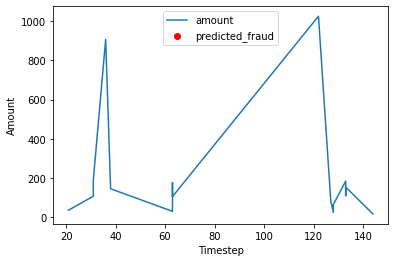

In [26]:
plt.plot(ts_example_data.timestamp, ts_example_data.value, label='amount')
predict_pos =np.where(ts_example_result.anomaly_score>=anomaly_score_threshold)
if predict_pos:
    plt.scatter(ts_example_data.iloc[predict_pos].timestamp, ts_example_data.iloc[predict_pos].value, label='predicted_fraud', color='red')
plt.xlabel('Timestep')
plt.ylabel('Amount')
plt.legend()
plt.show()

# References

Edgar Alonso Lopez-Rojas and Stefan Axelsson. 2014. BANKSIM: A BANK PAYMENTS SIMULATOR FOR FRAUD DETECTION RESEARCH.

Alexander Lavin and Subutai Ahmad. 2015. Evaluating Real-Time Anomaly Detection Algorithms – The Numenta Anomaly Benchmark.